In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# reading the data
df = pd.read_excel("C:\\Users\\23mim\\Downloads\\Data Visualization Assignmnet.xlsx")

In [3]:
# first few rows of the dataset
df.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [4]:
# Info about the dataset (dtypes, number of features etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    int64         
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ KB


From the above output it can observed that the data have 2 features of categorical nature, 1 numeric feature and a datetime feature.
We can even see that the "PLACE" variable has some null values.

### Feature Engineering and EDA

In [5]:
# Shape of the dataset
df.shape

(111, 4)

In total we have 111 record (rows) and 4 features (columns).

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

The "PLACE" feature has some missing values.

In [7]:
# The value counts of the "DESCRIPTION" feature
df['DESCRIPTION'].value_counts()

Beef          32
Prawns        31
Fish          13
Mango         10
Lemon          9
King Fish      7
Dates          3
Dryfruits      3
Dry fruits     2
Kadumanga      1
Name: DESCRIPTION, dtype: int64

We can see that "Dryfruits" and "Dry fruits" are actually the same type of food but one of the values is labelled with spaces between them. So, we can group these two values together as "Dry_fruits". Similarly, we can group "King Fish" as "Fish".

In [8]:
# Creating a copy of the dataframe
df_copy = df.copy(deep=True)

In [9]:
# View the copied dataset
df_copy.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [10]:
# Replacing the "Dryfruits" and "Dry fruits" with "Dry_fruits" which will group the two values as one value and also changing the "King Fish" value to "Fish".
df_copy["DESCRIPTION"] = df_copy['DESCRIPTION'].replace(to_replace={"Dryfruits":"Dry_fruits", "Dry fruits":"Dry_fruits", "King Fish":"Fish"})

In [11]:
# Checking the values of the "DESCRIPTION" feature
df_copy['DESCRIPTION'].value_counts()

Beef          32
Prawns        31
Fish          20
Mango         10
Lemon          9
Dry_fruits     5
Dates          3
Kadumanga      1
Name: DESCRIPTION, dtype: int64

In [12]:
# Creating a function to give the category names to which the different food items belong.
def catg(item):
    if item == "Beef":
        return "Meat"
    elif item == "Prawns":
        return "Seafood"
    elif (item == "Mango") or (item == "Lemon") or (item == "Dates"):
        return "Fruit"
    elif (item == "Fish") or (item == "Dry_fruits"):
        return item
    else:
        return "Pickle"

In [13]:
# Applying the function just created
df_copy['CATEGORY'] = df_copy['DESCRIPTION'].apply(catg)

In [14]:
# view the dataset
df_copy.head()

,DATE,DESCRIPTION,UNIT,PLACE,CATEGORY
0,2022-04-01,Beef,1,Kolenchery,Meat
1,2022-04-01,Fish,1,Kolenchery,Fish
2,2022-04-03,Beef,2,Tripunithura,Meat
3,2022-04-05,Prawns,1,Bangalore,Seafood
4,2022-04-06,Dates,1,Mangalore,Fruit


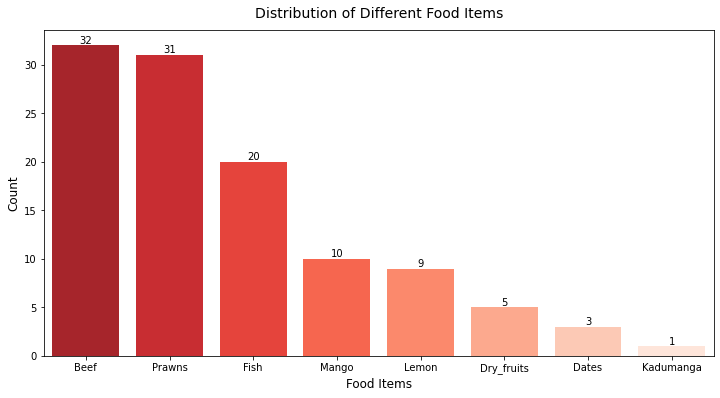

In [15]:
# Countplot of the variable 'DESCRIPTION'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_copy, x='DESCRIPTION', saturation=1, alpha=0.9, palette='Reds_r', order=df_copy['DESCRIPTION'].value_counts().index)

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black',
    fontweight='normal', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Food Items', fontsize=12)
plt.title('Distribution of Different Food Items', pad=12, fontsize=14);

From the above plot, it can be observed that beef and prawns are having higher numbers of sales (or orders).
While dry fuits, dates and kadumanga are having lesser numbers of sales.

In [86]:
# The value counts of the "CATEGORY" feature
df_copy['CATEGORY'].value_counts()

Meat          32
Seafood       31
Fruit         22
Fish          20
Dry_fruits     5
Pickle         1
Name: CATEGORY, dtype: int64

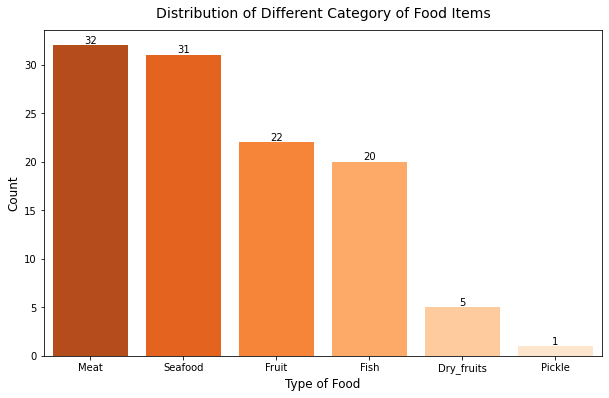

In [17]:
# Countplot of the variable 'CATEGORY'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_copy, x='CATEGORY', saturation=1, alpha=0.9, palette='Oranges_r', order=df_copy['CATEGORY'].value_counts().index)

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black',
    fontweight='normal', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Type of Food', fontsize=12)
plt.title('Distribution of Different Category of Food Items', pad=12, fontsize=14);

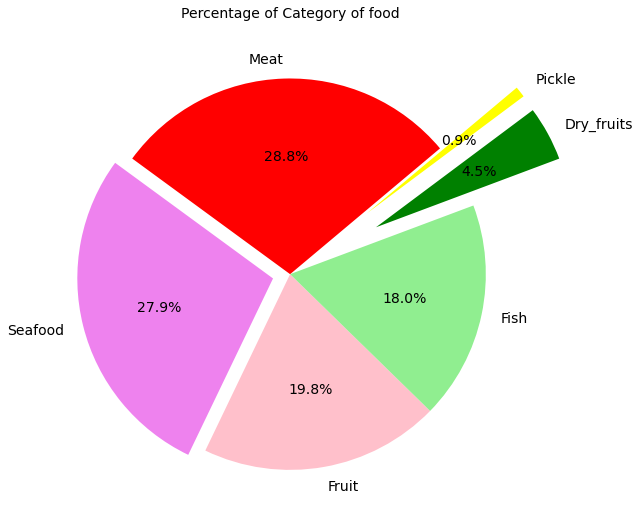

In [146]:
# Pie-chart of the distribution of category of food
plt.figure(figsize=(9, 9))
data_pie_chart_category = df_copy['CATEGORY'].value_counts().reset_index().rename(columns={'index':"CATEGORY", 'CATEGORY':"counts"})['counts']
labels = ['Meat', 'Seafood', 'Fruit', 'Fish', 'Dry_fruits', 'Pickle']
colors = ['red', "violet", "pink", "lightgreen", "green", "yellow"]
plt.pie(x=data_pie_chart_category, labels=labels, startangle=40, autopct='%.1f%%', colors=colors, explode=(0, 0.09, 0, 0, 0.5, 0.5), textprops={'fontsize':14})
plt.title('Percentage of Category of food', pad=12, fontsize=14);

Meat, seafood are two food categories that are highest sold. While pickle and dry fuits are having lowest sellings.

In [18]:
# Grouping the different food items and getting the total units sold for each item
total_units = df_copy.groupby(by=['DESCRIPTION'])['UNIT'].sum().reset_index().rename(columns={"UNIT":"TOTAL_UNITS"})
total_units

,DESCRIPTION,TOTAL_UNITS
0,Beef,52
1,Dates,4
2,Dry_fruits,7
3,Fish,38
4,Kadumanga,1
5,Lemon,13
6,Mango,19
7,Prawns,57


In [19]:
# Sorting the total units and reseting the index
total_units = total_units.sort_values(by='TOTAL_UNITS', ascending=False).reset_index(drop=True)
total_units

,DESCRIPTION,TOTAL_UNITS
0,Prawns,57
1,Beef,52
2,Fish,38
3,Mango,19
4,Lemon,13
5,Dry_fruits,7
6,Dates,4
7,Kadumanga,1


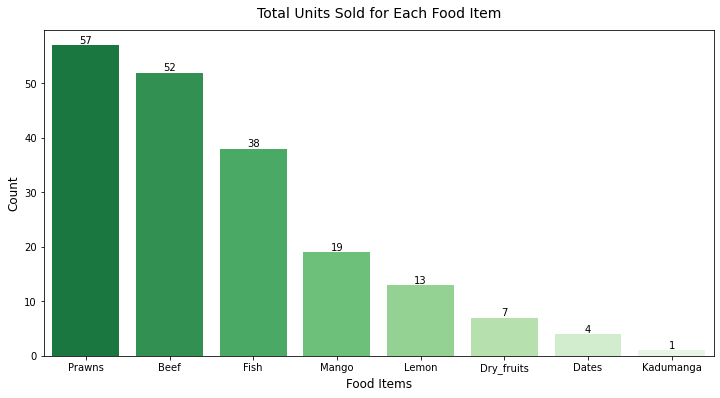

In [20]:
# Countplot of the variable 'CATEGORY'
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_units, x='DESCRIPTION', y='TOTAL_UNITS', saturation=1, alpha=0.9, palette='Greens_r')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black',
    fontweight='normal', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Food Items', fontsize=12)
plt.title('Total Units Sold for Each Food Item', pad=12, fontsize=14);

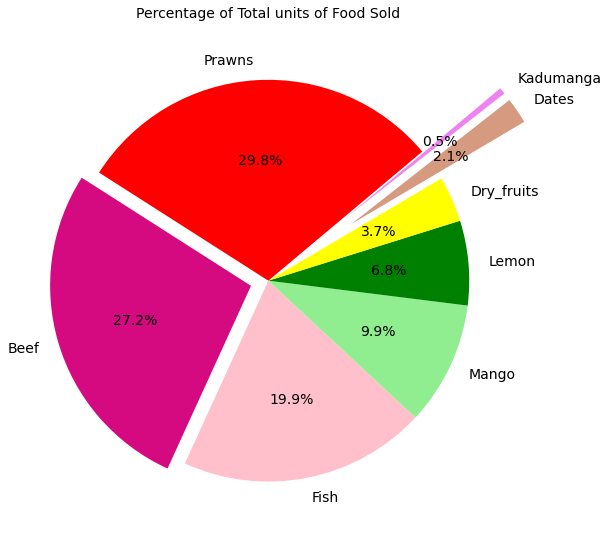

In [149]:
# Pie-chart of the distribution of total units of food sold
plt.figure(figsize=(9, 10))
data_pie_chart_category = total_units['TOTAL_UNITS']
labels = ['Prawns', 'Beef', 'Fish', 'Mango', 'Lemon', 'Dry_fruits', 'Dates', 'Kadumanga']
colors = ['red', "#D50A81", "pink", "lightgreen", "green", "yellow", "#D69A80", "violet"]
plt.pie(x=data_pie_chart_category, labels=labels, startangle=40, autopct='%.1f%%', colors=colors, explode=(0, 0.09, 0, 0, 0, 0, 0.5, 0.5), textprops={'fontsize':14})
plt.title('Percentage of Total units of Food Sold', pad=12, fontsize=14);

Prawns are having the highest total sales followed by beef and fish. While dry fruits, dates and kadumanga are having quite lesser total sales.

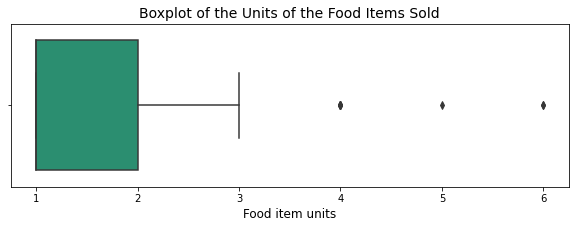

In [104]:
# Boxplot of the units of food items sold
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_copy, x='UNIT', palette="Dark2")
plt.title("Boxplot of the Units of the Food Items Sold", fontsize=14)
plt.xlabel('Food item units', fontsize=12);

From the above boxplot that most of the food items are sold between 1-2 units. There are also some outliers in the sense that some extreme values are present as data-points in the data.

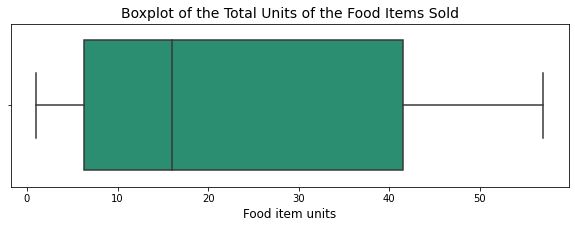

In [106]:
# Boxplot of the total units of food items sold
plt.figure(figsize=(10, 3))
sns.boxplot(data=total_units, x='TOTAL_UNITS', palette="Dark2")
plt.title("Boxplot of the Total Units of the Food Items Sold", fontsize=14)
plt.xlabel('Food item units', fontsize=12);

The above boxplot shows for the aggregated food items for their sale in total units.
Most of the food items are sold between 8 and 41 units with median being around 17-18 units.

In [21]:
# Print out the max (very recent) and min (oldest) dates 
print("The oldest date =", (df_copy['DATE'].min()))
print("The most recent date =", df_copy['DATE'].max())

The oldest date = 2022-04-01 00:00:00
The most recent date = 2022-07-15 00:00:00


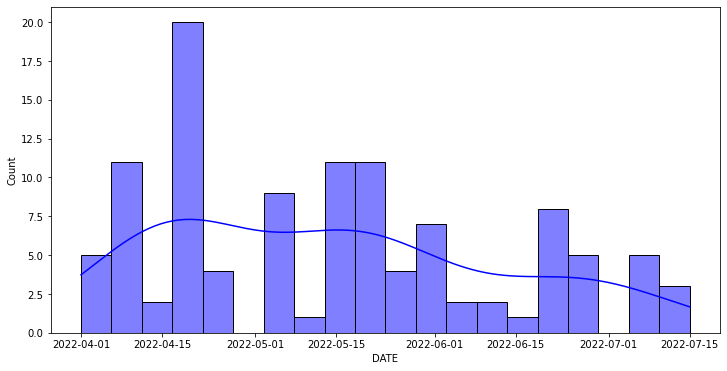

In [96]:
# Histogram of the "DATE" feature
plt.figure(figsize=(12, 6))
sns.histplot(data=df_copy['DATE'], bins=20, color='blue', kde=True);

We can observe that there is a very high activity between 2022-04-18 and 2022-04-21.

In [29]:
# Creating a "MONTH" column out of the "DATE" feature
df_copy['MONTH'] = df_copy['DATE'].dt.month
df_copy.head()

,DATE,DESCRIPTION,UNIT,PLACE,CATEGORY,MONTH
0,2022-04-01,Beef,1,Kolenchery,Meat,4
1,2022-04-01,Fish,1,Kolenchery,Fish,4
2,2022-04-03,Beef,2,Tripunithura,Meat,4
3,2022-04-05,Prawns,1,Bangalore,Seafood,4
4,2022-04-06,Dates,1,Mangalore,Fruit,4


In [72]:
# Checking the counts of the 'MONTH' feature
df_copy['MONTH'].value_counts()

4    42
5    39
6    22
7     8
Name: MONTH, dtype: int64

We can see that there are only 4 months viz. April, May, June and July where the activities have take place.

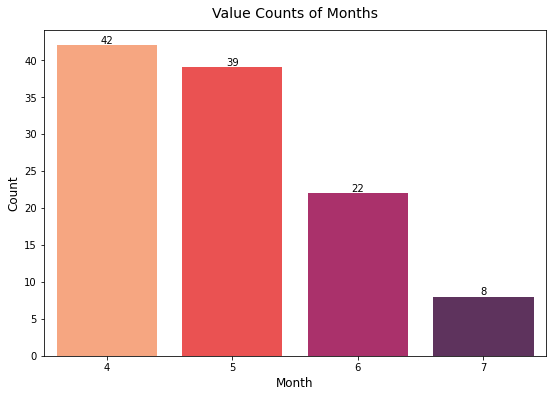

In [77]:
# Visualzing the MONTH feature
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df_copy, x='MONTH', saturation=1, alpha=0.9, palette='rocket_r')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black',
    fontweight='normal', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Value Counts of Months', pad=12, fontsize=14);

April and May have greater number of sales compared to June and July.

In [33]:
# aggregating total units based on months
monthly_total_units = df_copy.groupby(by=['MONTH'])['UNIT'].sum().reset_index().rename(columns={"UNIT":"MONTHLY_TOTAL_UNITS"})
monthly_total_units

,MONTH,MONTHLY_TOTAL_UNITS
0,4,68
1,5,55
2,6,54
3,7,14


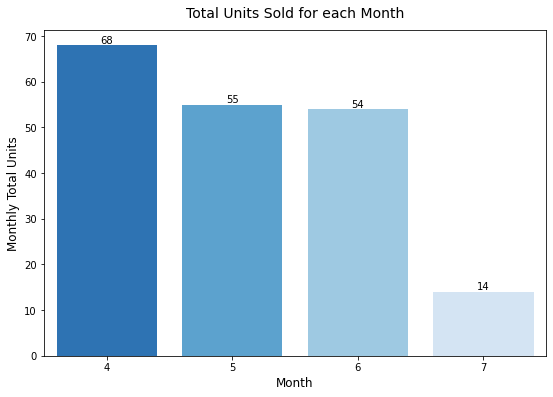

In [56]:
# Visualizing the monthly total units
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=monthly_total_units, x='MONTH', y='MONTHLY_TOTAL_UNITS', saturation=1, alpha=0.9, palette='Blues_r')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black',
    fontweight='normal', fontsize=10)

plt.ylabel('Monthly Total Units', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Units Sold for each Month', pad=12, fontsize=14);

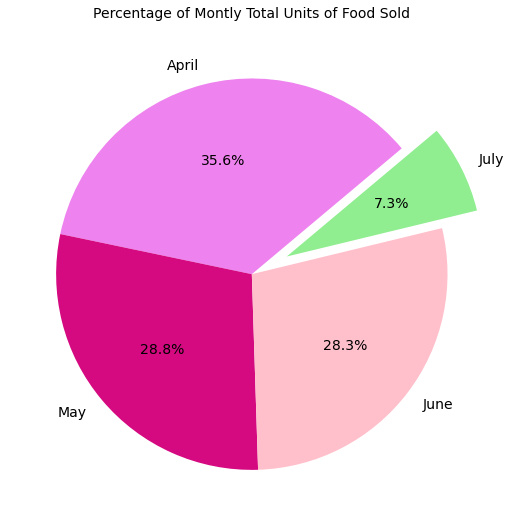

In [155]:
# Pie-chart of the distribution of Montly total units of food sold
plt.figure(figsize=(9, 9))
data_pie_chart_category = monthly_total_units['MONTHLY_TOTAL_UNITS']
labels = ['April', 'May', 'June', 'July']
colors = ['violet', "#D50A81", "pink", "lightgreen"]
plt.pie(x=data_pie_chart_category, labels=labels, startangle=40, autopct='%.1f%%', colors=colors, explode=(0, 0, 0, 0.2), textprops={'fontsize':14})
plt.title('Percentage of Montly Total Units of Food Sold', pad=12, fontsize=14);

April has the highest total amount of sales followed by May and June.

In [63]:
# Find the place where highest units are sold
df_copy[df_copy['UNIT'] == df_copy['UNIT'].max()]

,DATE,DESCRIPTION,UNIT,PLACE,CATEGORY,MONTH
81,2022-06-01,Fish,6,Thrissur/ Guruvayoor,Fish,6
82,2022-06-01,Prawns,6,Eloor,Seafood,6


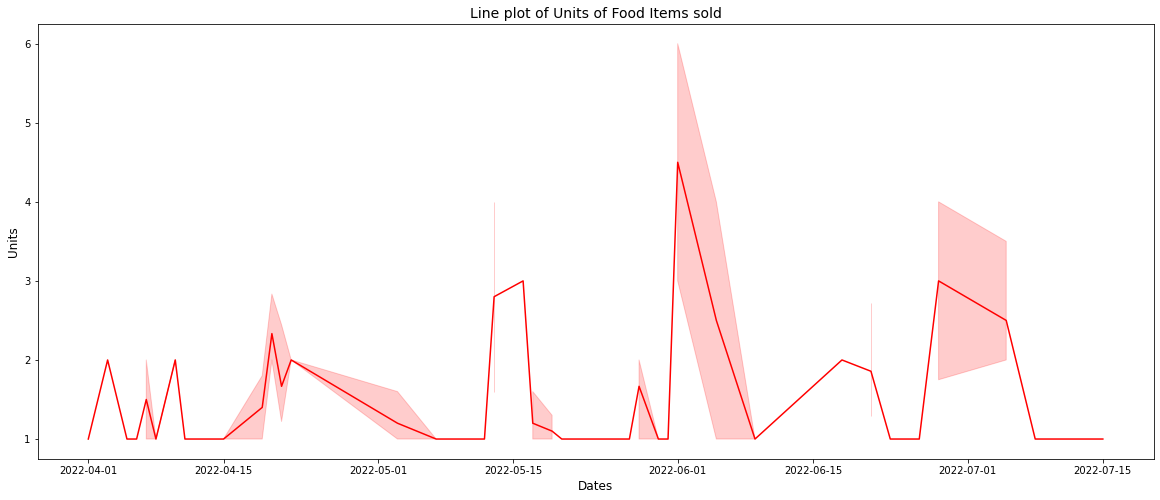

In [169]:
# Lineplot of the units sold for the duration between 2022-04-01 and 2022-07-15
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_copy, x='DATE', y='UNIT', color='red')
plt.xlabel("Dates", fontsize=12)
plt.ylabel('Units', fontsize=12)
plt.title("Line plot of Units of Food Items sold", fontsize=14);

The above lineplot shows the units of food item sold for the given dates.
We can observe that on 2022-06-01 has the highest units of food item sold.